In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data = data.drop(columns=['Id'],axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.size

750

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

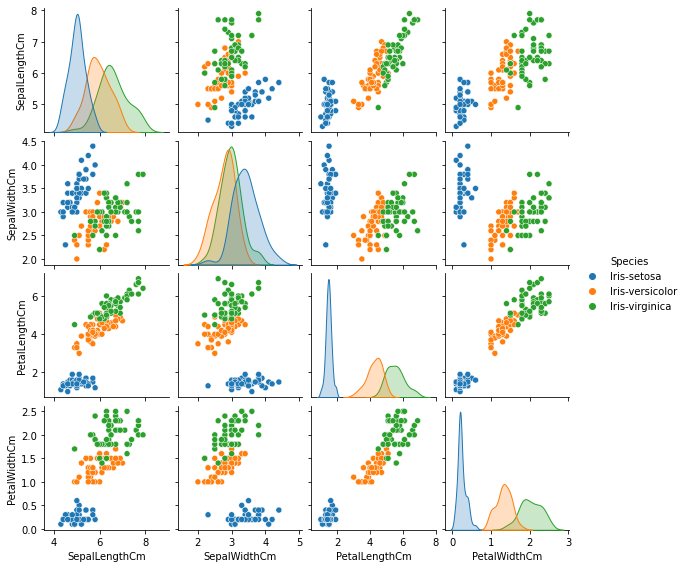

In [11]:
sns.pairplot(data,hue='Species',size=2)

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

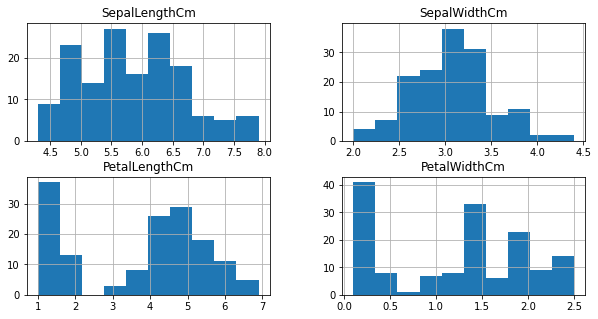

In [12]:
data.hist(figsize=(10,5))

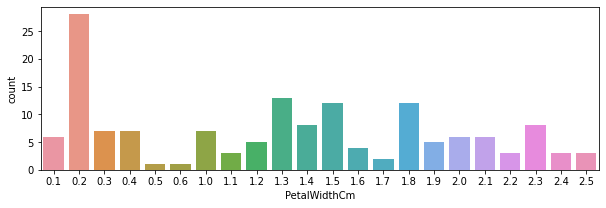

In [13]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data['PetalWidthCm'])
plt.show()

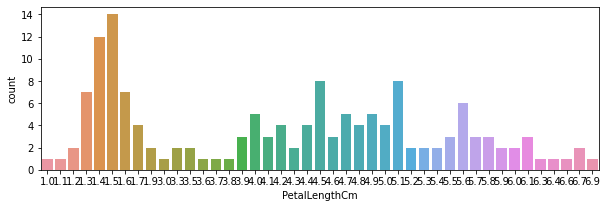

In [14]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data['PetalLengthCm'])
plt.show()

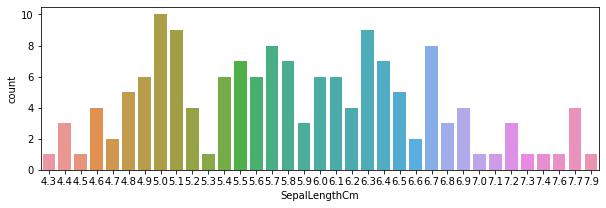

In [15]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data['SepalLengthCm'])
plt.show()

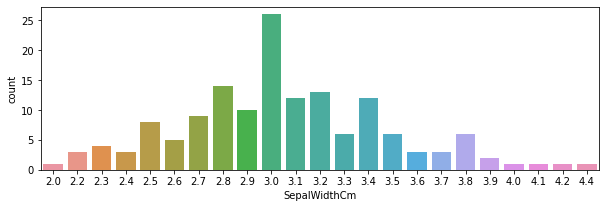

In [16]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data['SepalWidthCm'])
plt.show()

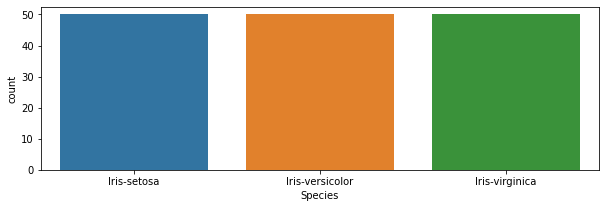

In [17]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data['Species'])
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

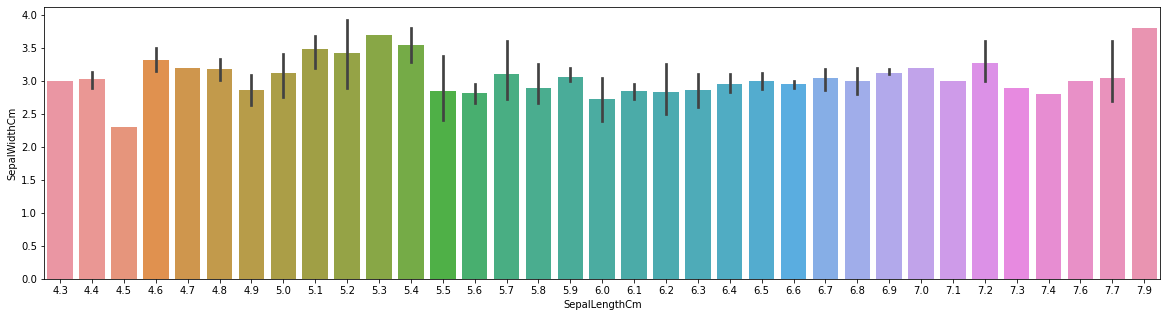

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data['SepalLengthCm'],data['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

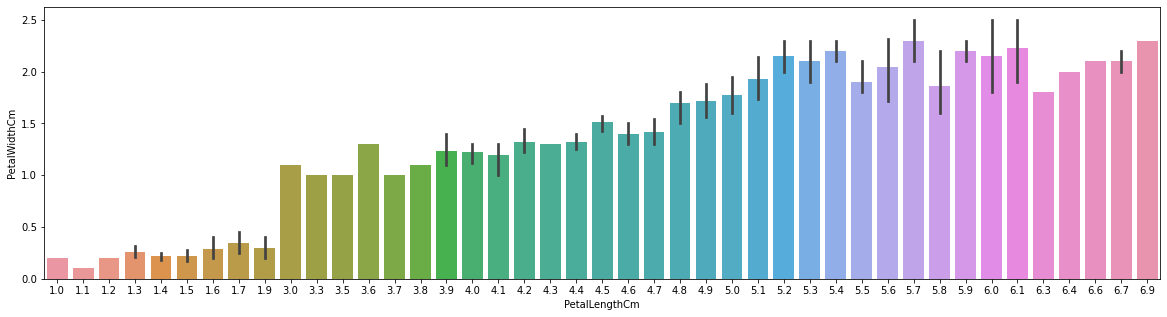

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data['PetalLengthCm'],data['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

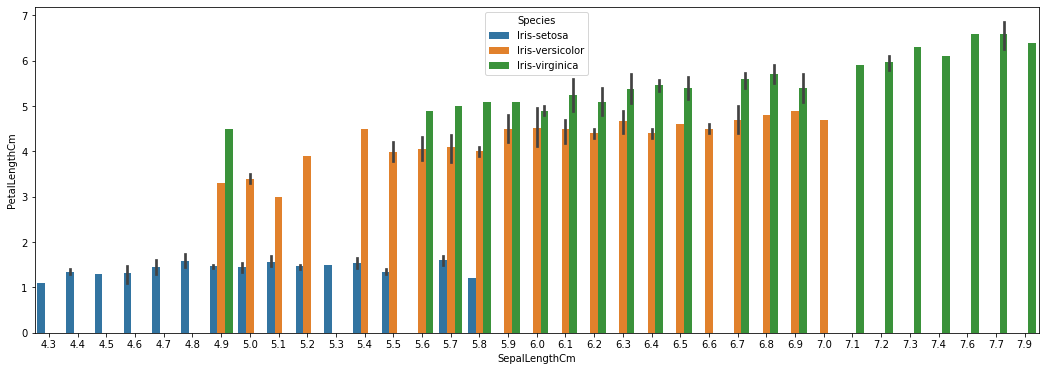

In [20]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['SepalLengthCm'],data['PetalLengthCm'],hue=data['Species'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

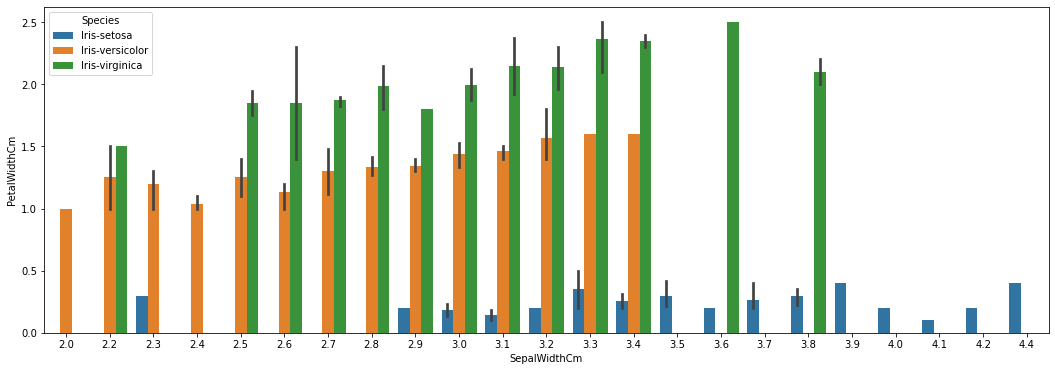

In [21]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['SepalWidthCm'],data['PetalWidthCm'],hue=data['Species'])

<AxesSubplot:>

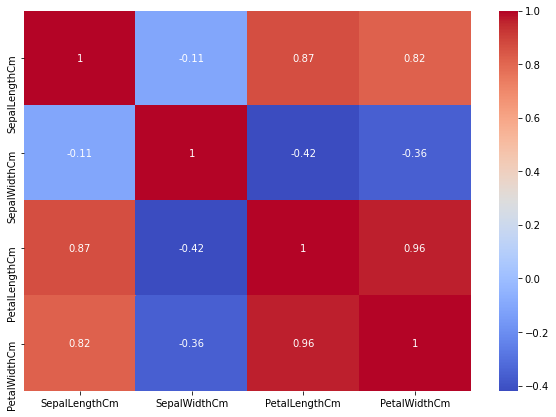

In [22]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [23]:
x = data.drop(columns=['Species'])
y = data['Species']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [25]:
x_train.shape

(105, 4)

In [26]:
x_test.shape

(45, 4)

In [27]:
model =LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9777777777777777

In [28]:
y_test

55     Iris-versicolor
64     Iris-versicolor
21         Iris-setosa
101     Iris-virginica
112     Iris-virginica
33         Iris-setosa
135     Iris-virginica
123     Iris-virginica
46         Iris-setosa
90     Iris-versicolor
138     Iris-virginica
133     Iris-virginica
87     Iris-versicolor
44         Iris-setosa
114     Iris-virginica
30         Iris-setosa
127     Iris-virginica
104     Iris-virginica
91     Iris-versicolor
8          Iris-setosa
78     Iris-versicolor
15         Iris-setosa
17         Iris-setosa
130     Iris-virginica
84     Iris-versicolor
144     Iris-virginica
14         Iris-setosa
118     Iris-virginica
63     Iris-versicolor
132     Iris-virginica
137     Iris-virginica
32         Iris-setosa
31         Iris-setosa
141     Iris-virginica
146     Iris-virginica
97     Iris-versicolor
23         Iris-setosa
66     Iris-versicolor
68     Iris-versicolor
12         Iris-setosa
27         Iris-setosa
134     Iris-virginica
96     Iris-versicolor
125     Iri

In [29]:
y_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [30]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,1,18


In [31]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 18]])

In [32]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [33]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9777777777777777

In [34]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,1,18


In [35]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 18]])

In [36]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [37]:
model = RandomForestClassifier(random_state=10,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9555555555555556

In [38]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,2,17


In [39]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 17]])

In [40]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [41]:
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9777777777777777

In [42]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,11,1
Iris-virginica,0,0,19


In [43]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 19]])

In [44]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [45]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [46]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.9111111111111111


In [47]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  4, 15]])

In [48]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,4,15


In [49]:
y_predict = model.predict(x_test)

In [50]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[14  0  0]
 [ 0 12  0]
 [ 0  4 15]]


<AxesSubplot:>

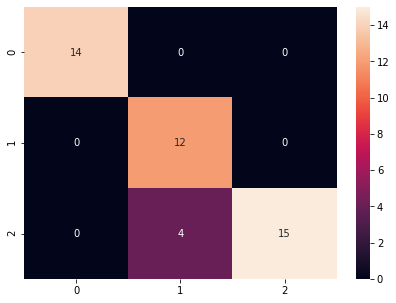

In [51]:
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [52]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.9111111111111111


In [53]:
pd.crosstab(y_test,y_predict)


col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,4,15


In [54]:
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9111111111111111

In [55]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,4,15


In [56]:
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8666666666666667

In [57]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({'Iris-virginica': 19, 'Iris-setosa': 14, 'Iris-versicolor': 12})


col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,14,0,0
Iris-versicolor,0,12,0
Iris-virginica,0,6,13


In [58]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [59]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9777777777777777,
 'Random Forest': 0.9555555555555556,
 'DecisionTree': 0.9777777777777777,
 'KNN': 0.9111111111111111,
 'MPL': 0.9777777777777777,
 'XGB': 0.9333333333333333,
 'SVM': 0.9555555555555556}

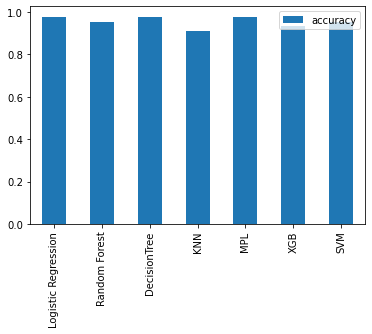

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();